<a href="https://colab.research.google.com/github/GabyDs/FirearmShotDetectionSystem/blob/main/FirearmShotDetectionSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [2]:
import os

import numpy as np
import pandas as pd
import csv

import scipy
from scipy import signal

import matplotlib.pyplot as plt

import librosa, librosa.display
import IPython.display as ipd


# Dataset

In [ ]:
!wget -c --no-check-certificate "https://drive.google.com/u/0/uc?id=1AFySnqxTCFhdeZZ02XpbUStgJyZoAirw&confirm=t" -O train.zip

In [ ]:
!unzip train.zip

# Explore Dataset

In [96]:
# directory sound
shoot_sound = '/content/Audios_disparos_selva/train/disparos/58FFC9D0d492a45d-c088-4d6b-9681-4056ae7aec10.WAV'
background_sound = '/content/Audios_disparos_selva/train/fondo/5C0305B3.WAV'

In [97]:
# load sounds
sound, fs = librosa.load(background_sound)

## Spectrogram

In [98]:
def plot_spectrogram(signal, name):
    """Compute power spectrogram with Short-Time Fourier Transform and plot result."""
    spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(signal)))
    plt.figure(figsize=(8, 5))
    librosa.display.specshow(spectrogram, y_axis="log")
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Log-frequency power spectrogram for {name}")
    plt.xlabel("Time")
    plt.show()

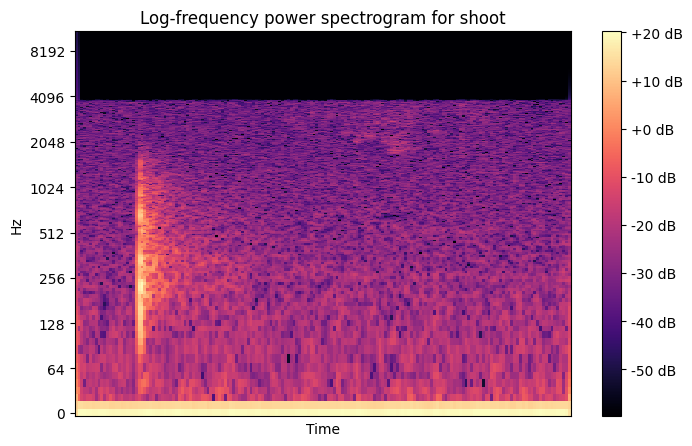

In [99]:
plot_spectrogram(sound, "shoot")

## Listen sound

In [100]:
ipd.Audio(sound, rate=fs)

## Amplitude

In [101]:
X = np.fft.fft(sound)

In [102]:
X_mag = np.abs(X)
f = np.linspace(0, _, len(X_mag))

Text(0.5, 0, 'Frequency (Hz)')

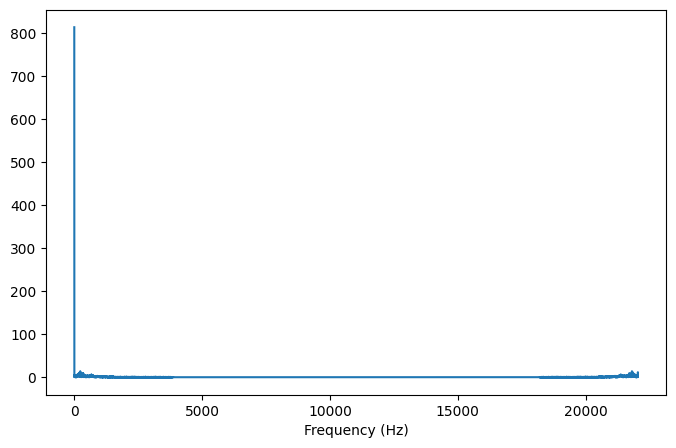

In [103]:
plt.figure(figsize=(8, 5))
plt.plot(f, X_mag) # magnitude spectrum
plt.xlabel('Frequency (Hz)')